# EDA (Exploratory Data Analysis)

Librerias a utilizar:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

Función para evaluar datos nulos y repetidos en cada columna

In [4]:
def eval_registros(df):
    columnas=df.columns
    for columna in columnas:
        count_null = df[columna].isnull().sum()
        count_t = df[columna].shape[0]
        count_r=df[columna].duplicated().sum()
        count_unic = count_t-count_r
        print('La columna {} tiene {} registros nulos, {} datos unicos y {} registros repetidos entre ellos'.format(columna, count_null, count_unic, count_r))

## Analisis de la base de datos UDEMY

In [5]:
# lectura del dataset
udemy_courses=pd.read_csv(r'Moocs\udemy_courses.csv', sep=',', encoding='utf8')

In [6]:
# Visualizacion del dataset y su informacion
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
#Utilizacion de funcion creada para evaluar las columnas 
eval_registros(udemy_courses)

La columna course_id tiene 0 registros nulos, 3672 datos unicos y 6 registros repetidos entre ellos
La columna course_title tiene 0 registros nulos, 3663 datos unicos y 15 registros repetidos entre ellos
La columna url tiene 0 registros nulos, 3672 datos unicos y 6 registros repetidos entre ellos
La columna is_paid tiene 0 registros nulos, 2 datos unicos y 3676 registros repetidos entre ellos
La columna price tiene 0 registros nulos, 38 datos unicos y 3640 registros repetidos entre ellos
La columna num_subscribers tiene 0 registros nulos, 2197 datos unicos y 1481 registros repetidos entre ellos
La columna num_reviews tiene 0 registros nulos, 511 datos unicos y 3167 registros repetidos entre ellos
La columna num_lectures tiene 0 registros nulos, 229 datos unicos y 3449 registros repetidos entre ellos
La columna level tiene 0 registros nulos, 4 datos unicos y 3674 registros repetidos entre ellos
La columna content_duration tiene 0 registros nulos, 105 datos unicos y 3573 registros repeti

Se observa que hay registros duplicados, columnas innecesarias como `url`, y otras que necesitan estandarizacion. Por lo que se procede a trabajar sobre las mismas.

In [9]:
#eliminacion de duplicados y columnas irrelevantes
udemy_courses=udemy_courses.drop_duplicates() #6 duplicados

udemy_courses.drop(['url'], axis=1, inplace=True)  

In [10]:
#La columna course_id la pasamos a variable categorica para analizar las variables numericas
udemy_courses['course_id']=udemy_courses['course_id'].astype('category')

In [11]:
#revision de medidas estadisticas
udemy_courses.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,66.102941,3190.586874,156.371460,40.140251,4.097603
std,61.035920,9488.105448,936.178649,50.417102,6.057830
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.750000,4.000000,15.000000,1.000000
50%,45.000000,912.000000,18.000000,25.000000,2.000000
75%,95.000000,2548.750000,67.000000,46.000000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


De las medidas estadisticas se observa que hay datos con duracion de curso nula, ademas de otros con valores alejados de la media. Se procede a revisar dichos valores para descartar posibles outliers que puedan sesgar las metricas a evaluar

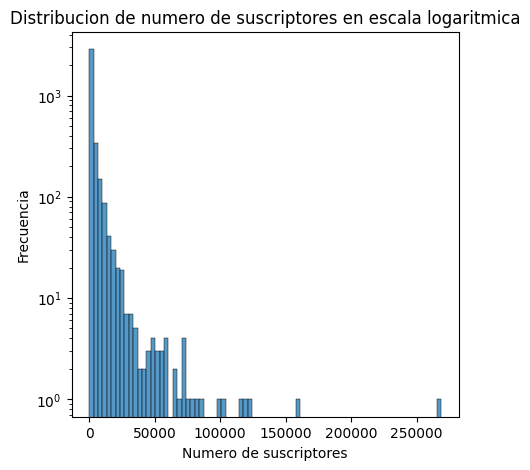

In [12]:
# distribucion de suscriptores en escala logaritmica
plt.figure(figsize = (5,5))
plot = sns.histplot(data=udemy_courses[udemy_courses['num_subscribers']!=0],  x ='num_subscribers', bins=80, log=True)
plt.title('Distribucion de numero de suscriptores en escala logaritmica')
plt.xlabel('Numero de suscriptores')
plt.ylabel('Frecuencia')
plt.show()

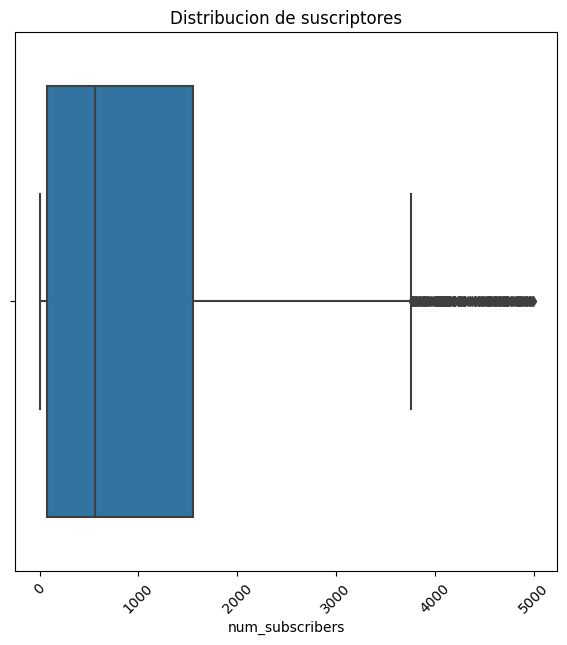

In [13]:
# distribucion de suscriptores
plt.figure(figsize = (7,7))
plot = sns.boxplot(data=udemy_courses[udemy_courses['num_subscribers']<5000],  x = 'num_subscribers')
plt.xticks(rotation=45)
plt.title('Distribucion de suscriptores')
plt.show()

In [14]:
# eliminacion de datos con num_lectures y duration nula
udemy_courses=udemy_courses.drop(udemy_courses[udemy_courses['content_duration']==0].index)

<Figure size 700x700 with 0 Axes>

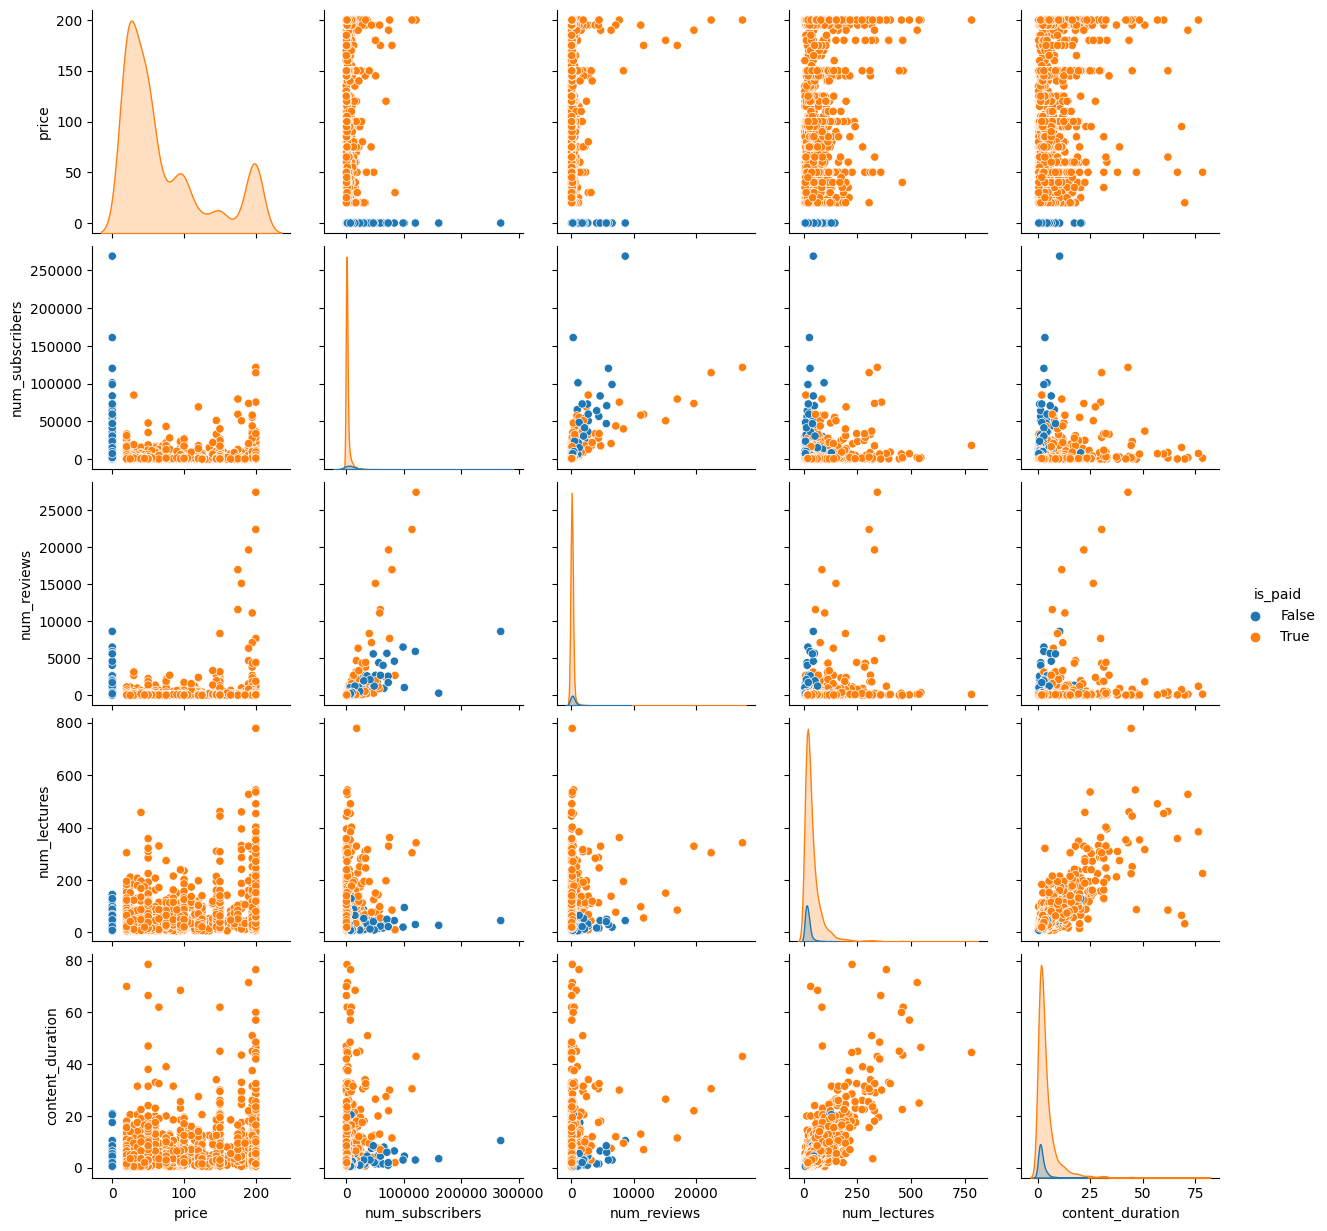

In [15]:
# Relacion entre las variables numericas
plt.figure(figsize = (7,7))
plot=sns.pairplot(data=udemy_courses, hue="is_paid")
plt.show()

In [16]:
#revision la cant de cursos por forma de pago (gratuitos/pagos)
udemy_courses['is_paid'].value_counts()

True     3361
False     310
Name: is_paid, dtype: int64

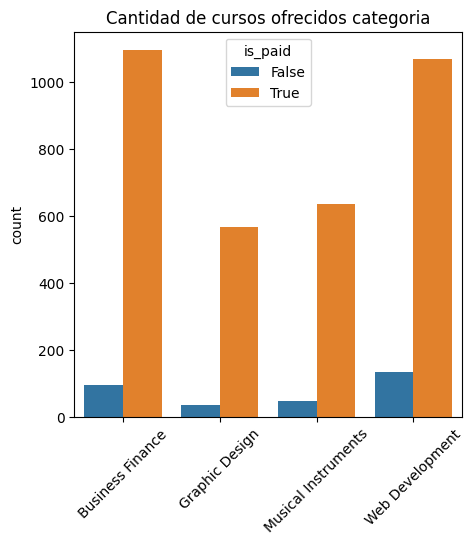

In [17]:
# Grafico para visualizar la cantidad de los cursos por las distintas categorias
plt.figure(figsize = (5,5))
plot = sns.countplot(data=udemy_courses, x='subject', hue='is_paid' )
plt.xticks(rotation=45)
plt.title('Cantidad de cursos ofrecidos categoria')
plt.xlabel('')
plt.show()

Se observa que todas las categorias de cursos ofrecen cursos gratuitos casi en la misma proporcion. Siendo esta menor al 10% en relacion a los cursos pagos

In [18]:
# Revision de los distintos niveles de dificultad de los cursos
udemy_courses['level'].value_counts()

All Levels            1924
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [19]:
udemy_courses['level']=udemy_courses['level'].replace({'All Levels':'All', 'Beginner Level':'Introductory','Intermediate Level':'Intermediate','Expert Level':'Advanced'})

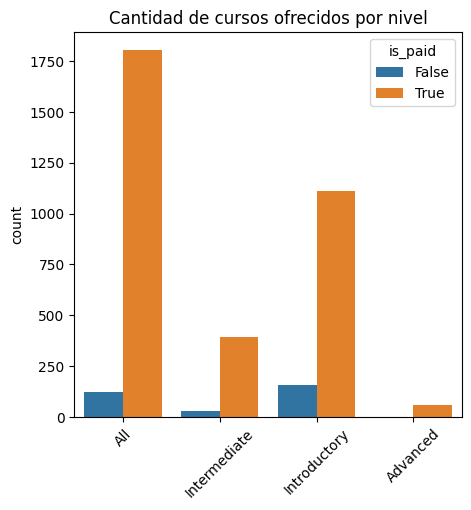

In [20]:
#revision la cant de cursos por nivel
plt.figure(figsize = (5,5))
plot = sns.countplot(data=udemy_courses, x='level', hue='is_paid' )
plt.xticks(rotation=45)
plt.title('Cantidad de cursos ofrecidos por nivel')
plt.xlabel('')
plt.show()

En el caso de la segmentacion de cursos por nivel de dificultad la proporcion de cursos gratuitos no es la misma que en la segmentacion por categorias. La mayoria de los cursos pertenecen al nivel completo, es decir, que no se requiere conocimientos previos sobre la tematica ofrecida.

<Figure size 500x500 with 0 Axes>

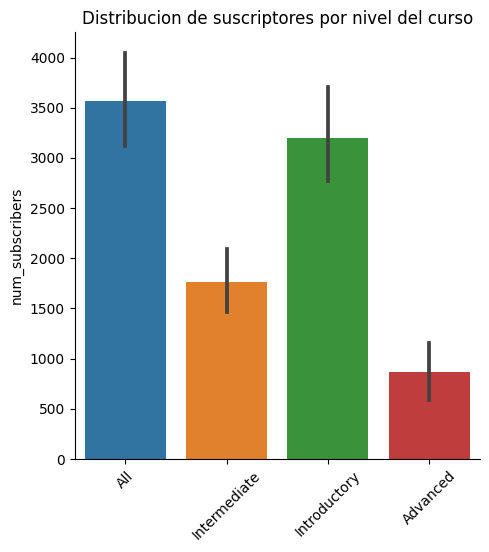

In [21]:
# distribucion de suscriptores por nivel de curso
plt.figure(figsize = (5,5))
plot = sns.catplot(data=udemy_courses, x ='level', y ='num_subscribers', kind='bar')
plt.xticks(rotation=45)
plt.title('Distribucion de suscriptores por nivel del curso')
plt.xlabel('')
plt.show()

In [22]:
udemy_courses[(udemy_courses['num_subscribers']>600) & (udemy_courses['level']=='Advanced')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
8,476268,Options Trading 3 : Advanced Stock Profit and ...,True,195,5172,34,38,Advanced,2.5,2015-05-28T00:14:03Z,Business Finance
50,1142570,How I Learned Stock Trading (and How You Can Too),True,200,1580,12,53,Advanced,2.0,2017-05-02T21:20:54Z,Business Finance
80,1057242,Learn How to Set Up an Incubator Hedge Fund - ...,True,200,1406,71,54,Advanced,1.5,2017-01-18T20:55:27Z,Business Finance
121,44836,Option Spreads and Credit Spreads Bundle,True,180,2212,194,24,Advanced,4.5,2013-03-05T18:27:38Z,Business Finance
127,236080,Elliott Wave -Forex Trading With The Elliott W...,True,90,4022,35,14,Advanced,1.0,2016-12-15T15:49:13Z,Business Finance
200,42643,Master Iron Condors - Double the credit for ha...,True,60,1338,139,7,Advanced,1.0,2013-03-02T13:27:41Z,Business Finance
231,530768,Advanced Stock Options for Serious Equity Inve...,True,200,1271,23,7,Advanced,1.5,2015-09-22T19:48:31Z,Business Finance
265,808506,Candlestick Analysis For Professional Traders,True,95,913,117,48,Advanced,2.0,2016-05-18T16:04:14Z,Business Finance
381,738910,[Value Investing] Where White People Keep Thei...,True,200,2715,70,20,Advanced,4.0,2016-05-25T21:04:41Z,Business Finance
493,429662,Trend Following Stocks: A Complete Trading System,True,95,1202,76,64,Advanced,3.5,2015-03-23T17:03:31Z,Business Finance


La cantidad de suscriptores segun nivel de dificultad esta dentro de todo balanceada, sin embargo para nivel avanzado se observa valores fuera de la media. Al filtrar la base de datos para analizar estos valores se puede notar que son cursos pagos en su mayoria de la categoria `Business Finance`

Por otro lado se observa que un registro presenta error ya que fue publicado a la misma fecha pero uno con titulo 'Introduction to Node.js Development' y de nivel 'Advanced', mientras que el  correcto esta titulado como 'Advanced Node.js Development' y pertenece al nivel de dificultad correcto.

In [23]:
udemy_courses=udemy_courses.drop(udemy_courses[(udemy_courses['course_title']=='Introduction to Node.js Development') & (udemy_courses['level']=='Advanced')].index)

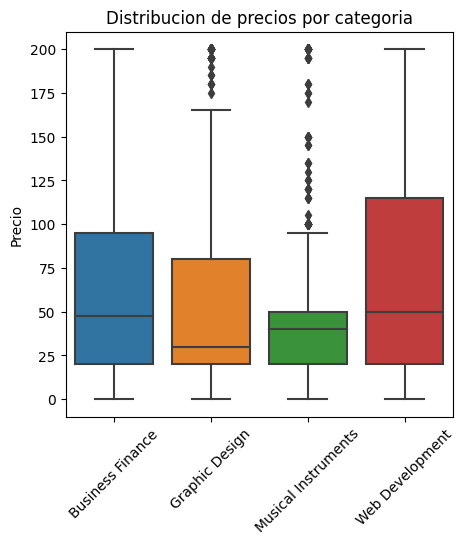

In [24]:
# distribucion de precios por categoria
plt.figure(figsize = (5,5))
plot = sns.boxplot(data=udemy_courses,  x = 'subject', y = 'price')
plt.xticks(rotation=45)
plt.title('Distribucion de precios por categoria')
plt.xlabel('')
plt.ylabel('Precio')
plt.show()

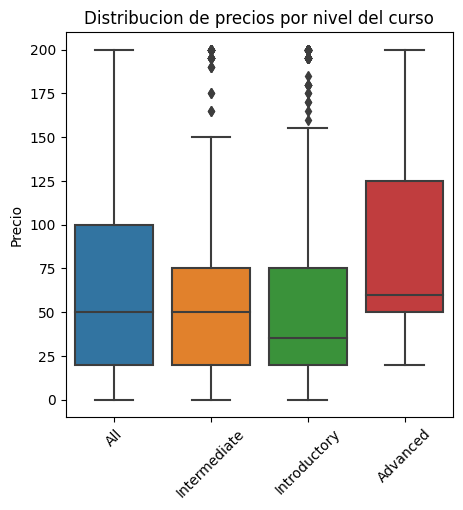

In [25]:
# distribucion de precios por nivel de curso
plt.figure(figsize = (5,5))
plot = sns.boxplot(data=udemy_courses,  x = 'level', y = 'price')
plt.xticks(rotation=45)
plt.title('Distribucion de precios por nivel del curso')
plt.xlabel('')
plt.ylabel('Precio')
plt.show()

Los precios deben ser acorde a la categoria y nivel de dificultad, sin embargo se observan valores fuera del rango itercuatilico. 

La media entre los precios por nivel de curso es similar mientras que por categoria si hay mayor variacion, lo cual es de esperarse porque el precio de un curso tiende a ser medido segun la categoria a la que pertenece. 

<Figure size 500x500 with 0 Axes>

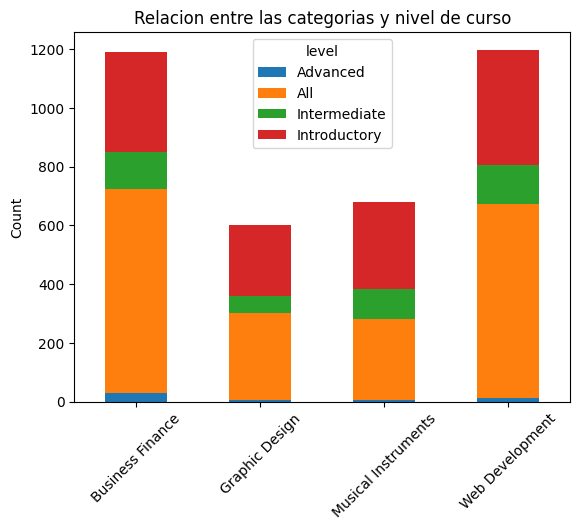

In [26]:
# relacion entre categorias y nivel del curso
plt.figure(figsize = (5,5))
contingency_table = pd.crosstab(udemy_courses['subject'], udemy_courses['level'])
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Relacion entre las categorias y nivel de curso')
plt.xticks(rotation=45)
plt.show()

In [27]:
#revisamos la fecha minima y maxima de los registros 
udemy_courses['published_timestamp']=pd.to_datetime(udemy_courses['published_timestamp'])

udemy_courses.published_timestamp.describe()

C:\Users\daine\AppData\Local\Temp\ipykernel_10248\2341347509.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  udemy_courses.published_timestamp.describe()


count                          3670
unique                         3670
top       2017-01-18 20:58:58+00:00
freq                              1
first     2011-07-09 05:43:31+00:00
last      2017-07-06 21:46:30+00:00
Name: published_timestamp, dtype: object

C:\Users\daine\AppData\Local\Temp\ipykernel_10248\985406839.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  udemy_courses['date_trimester']=udemy_courses['published_timestamp'].dt.to_period('Q').astype(str)


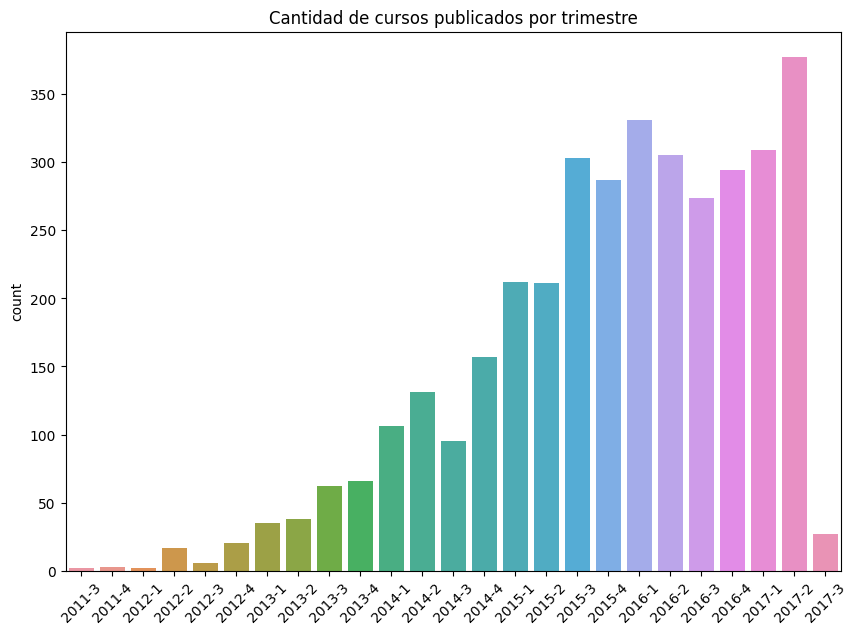

In [28]:
#Se cambia el formato a fecha y se calcular el cuatrimestre correspondiente a cada curso
udemy_courses['date_trimester']=udemy_courses['published_timestamp'].dt.to_period('Q').astype(str)
udemy_courses['date_trimester']=udemy_courses['date_trimester'].str.replace('Q', '-')

#visualizacion de cantidad de cursos publicados cuatrimestre
plt.figure(figsize = (10,7))
plot = sns.countplot(x=udemy_courses['date_trimester'].sort_values())
plt.xticks(rotation=45)
plt.title('Cantidad de cursos publicados por trimestre')
plt.xlabel('')
plt.show()

En la escala de tiempo se puede ver que Udemy aumento la cantidad de cursos ofrecidos en el transcurso del tiempo, y tuvo 2 picos de crecimiento correspondientes al segundo semestre 2015 y primer trimestre 2017.

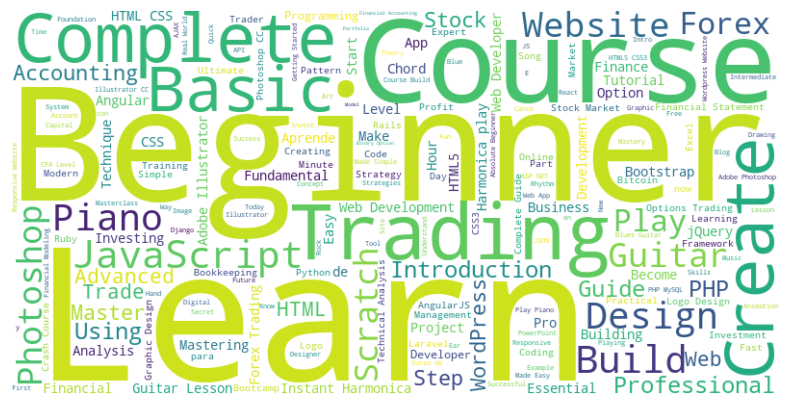

In [29]:
# Nube de palabras para los distintos cursos ofrecidos por Udemy
cursos=' '.join(udemy_courses['course_title'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cursos)

# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
udemy_courses.shape

(3670, 12)

## EDX

In [31]:
# lectura del dataset
edx_courses=pd.read_csv(r'Moocs\edx_courses.csv', sep=',', encoding='utf8')

In [32]:
#visualizacion del dataset y su informacion
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [33]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [34]:
#Utilizacion de funcion para evaluar las columnas 
eval_registros(edx_courses)

La columna title tiene 0 registros nulos, 972 datos unicos y 3 registros repetidos entre ellos
La columna summary tiene 53 registros nulos, 888 datos unicos y 87 registros repetidos entre ellos
La columna n_enrolled tiene 120 registros nulos, 850 datos unicos y 125 registros repetidos entre ellos
La columna course_type tiene 0 registros nulos, 2 datos unicos y 973 registros repetidos entre ellos
La columna institution tiene 0 registros nulos, 111 datos unicos y 864 registros repetidos entre ellos
La columna instructors tiene 3 registros nulos, 776 datos unicos y 199 registros repetidos entre ellos
La columna Level tiene 0 registros nulos, 3 datos unicos y 972 registros repetidos entre ellos
La columna subject tiene 0 registros nulos, 31 datos unicos y 944 registros repetidos entre ellos
La columna language tiene 0 registros nulos, 9 datos unicos y 966 registros repetidos entre ellos
La columna subtitles tiene 3 registros nulos, 34 datos unicos y 941 registros repetidos entre ellos
La c

Se observa que hay registros repetidos, columnas innecesarias como `course_url`, `instructors`, `course_effort`, `course_description`, `summary` y `course_syllabus`, y otras que necesitan estandarizacion. 

De la columna `price` se extraera solo el precio del certificado. 

De la columna `n_enrolled` es necesario pasarlo a dato tipo entero. 

La columna `course_length` se extrae solo la duracion (en semanas) para pasarla a dato tipo entero.

In [35]:
# Eliminacion de duplicados
edx_courses=edx_courses.drop_duplicates() #1 duplicado

#eliminacion de las columnas consideradas irrelevantes

edx_courses.drop(['course_url','instructors', 'course_effort', 'course_description', 'course_syllabus', 'summary'],axis=1, inplace=True)

In [36]:
#La columna de los matriculados (enrolled) se pasa a tipo numerico

edx_courses['n_enrolled']=edx_courses['n_enrolled'].str.replace(',', '')
edx_courses['n_enrolled'].fillna(0, inplace=True)
edx_courses['n_enrolled']=edx_courses['n_enrolled'].astype(np.int64)

In [37]:
#Los valores nulos en matriculados se reemplaza por la media agrupando por nivel

#calculo de valor medio de matriculados por nivel de curso
mean_by_level=edx_courses.groupby(by='Level')['n_enrolled'].mean().round().astype(int)

# Reemplazo de valores nulos en matriculados por la media segun nivel de curso
edx_courses['n_enrolled']=edx_courses.apply(lambda row: mean_by_level[row['Level']] if row['n_enrolled'] == 0 else row['n_enrolled'], axis=1)

In [38]:
# Revision de los registros vacios en subtitles
edx_courses[edx_courses['subtitles'].isna()]

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_length,price
390,Analytics in Python,82210,Instructor-led on a course schedule,Columbia University,Intermediate,Business & Management,English,NaN,12 Weeks,FREE-Add a Verified Certificate for $249 USD
516,"Data, Models and Decisions in Business Analytics",36289,Instructor-led on a course schedule,Columbia University,Advanced,Business & Management,English,NaN,12 Weeks,FREE-Add a Verified Certificate for $249 USD
640,Ecodesign for Cities and Suburbs,28472,Self-paced on your time,University of British Columbia,Introductory,Environmental Studies,English,NaN,6 Weeks,FREE-Add a Verified Certificate for $99 USD


In [39]:
edx_courses[(edx_courses['language']=='English') & (edx_courses['subtitles']=='English')]
#707/776 cursos son dictados en ingles y tienen subtitulos en ingles.

#Se rellenan los valores faltantes en subtitulos por Ingles debido a la alta probabilidad de coincidencia entre ambos

edx_courses['subtitles'].fillna('English', inplace=True)

In [40]:
#De la columna price, se extrae el precio de certificacion

edx_courses['price_certification'] = edx_courses['price'].apply(lambda x: re.search(r'\$([\d.,]+) USD', str(x)).group(1).replace(',', '') if re.search(r'\$([\d.,]+) USD', str(x)) else None).astype(float)
edx_courses.drop(['price'], axis=1, inplace=True)

In [41]:
# de la columna course_length se extrae la duracion del curso en semanas para pasarla a variable numerica
edx_courses['course_length'].astype(str)
edx_courses['course_duration']=edx_courses['course_length'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)
edx_courses.drop(['course_length'], axis=1, inplace=True)

In [42]:
#la columna tipo de curso la modificamos por mayor comodidad
edx_courses['course_type']=edx_courses['course_type'].replace({'Self-paced on your time':'Self-paced', 'Instructor-led on a course schedule':'Instructor-led'})
edx_courses['course_type'].value_counts()

Self-paced        916
Instructor-led     58
Name: course_type, dtype: int64

In [43]:
eval_registros(edx_courses)

La columna title tiene 0 registros nulos, 972 datos unicos y 2 registros repetidos entre ellos
La columna n_enrolled tiene 0 registros nulos, 852 datos unicos y 122 registros repetidos entre ellos
La columna course_type tiene 0 registros nulos, 2 datos unicos y 972 registros repetidos entre ellos
La columna institution tiene 0 registros nulos, 111 datos unicos y 863 registros repetidos entre ellos
La columna Level tiene 0 registros nulos, 3 datos unicos y 971 registros repetidos entre ellos
La columna subject tiene 0 registros nulos, 31 datos unicos y 943 registros repetidos entre ellos
La columna language tiene 0 registros nulos, 9 datos unicos y 965 registros repetidos entre ellos
La columna subtitles tiene 0 registros nulos, 33 datos unicos y 941 registros repetidos entre ellos
La columna price_certification tiene 0 registros nulos, 47 datos unicos y 927 registros repetidos entre ellos
La columna course_duration tiene 0 registros nulos, 18 datos unicos y 956 registros repetidos entr

In [44]:
edx_courses[edx_courses['title'].duplicated()]

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,price_certification,course_duration
388,Marketing Management,43415,Instructor-led,"The University of Maryland, College Park-Unive...",Advanced,Business & Management,English,English,214.0,7
561,Introduction to Marketing,52141,Self-paced,The University of Edinburgh,Introductory,Business & Management,English,English,149.0,6


In [45]:
#revision de duplicados en titulos
edx_courses[edx_courses['title'].isin(['Marketing Management','Introduction to Marketing'])] #pertenecen a distintos niveles, instituciones y tipo de cursada

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,price_certification,course_duration
159,Marketing Management,80010,Self-paced,Indian Institute of Management Bangalore,Intermediate,Business & Management,English,"English, हिन्दी",150.0,9
161,Introduction to Marketing,169126,Self-paced,University of British Columbia,Introductory,Business & Management,English,English,150.0,6
388,Marketing Management,43415,Instructor-led,"The University of Maryland, College Park-Unive...",Advanced,Business & Management,English,English,214.0,7
561,Introduction to Marketing,52141,Self-paced,The University of Edinburgh,Introductory,Business & Management,English,English,149.0,6


In [46]:
# revision de medidas estadisticas
edx_courses.describe()

,n_enrolled,price_certification,course_duration
count,9.740000e+02,974.000000,974.000000
mean,5.243678e+04,100.467002,6.702259
std,1.115540e+05,69.607901,3.150173
min,5.001000e+03,5.000000,1.000000
25%,1.268525e+04,49.000000,4.000000
50%,3.135300e+04,79.000000,6.000000
75%,5.214100e+04,149.000000,8.000000
max,2.442271e+06,450.000000,18.000000


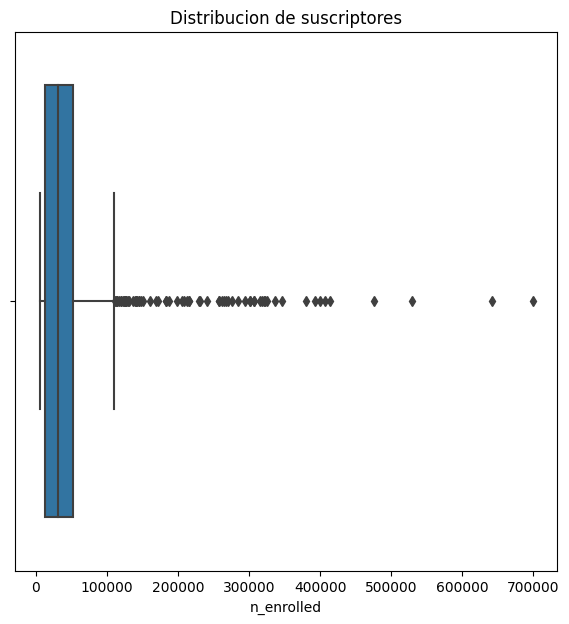

In [47]:
# distribucion de suscriptores
plt.figure(figsize = (7,7))
plot = sns.boxplot(data=edx_courses[edx_courses['n_enrolled']<800000],  x = 'n_enrolled')
plt.title('Distribucion de suscriptores')
plt.show()

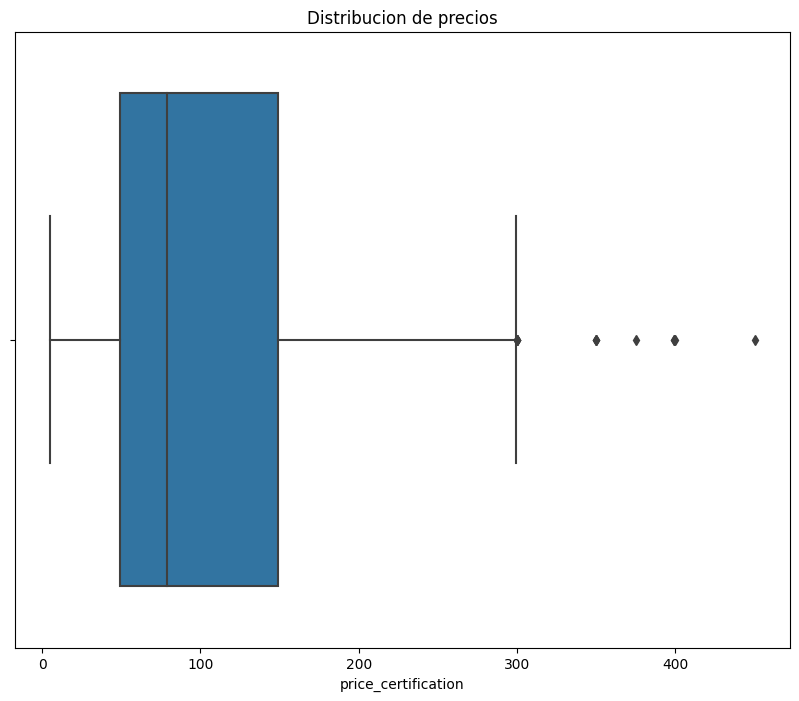

In [48]:
# distribucion de precios
plt.figure(figsize = (10,8))
plot = sns.boxplot(data=edx_courses,  x = 'price_certification')
plt.title('Distribucion de precios')
plt.show()

In [49]:
edx_courses[edx_courses['price_certification']>300]

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,price_certification,course_duration
19,Strategic Social Media Marketing,103640,Instructor-led,Boston University,Advanced,Business & Management,English,English,399.0,6
134,Python for Data Science,266978,Self-paced,"The University of California, San Diego",Advanced,Data Analysis & Statistics,English,English,350.0,10
157,Foundations of Modern Finance I,24108,Instructor-led,Massachusetts Institute of Technology,Advanced,Economics & Finance,English,English,450.0,12
163,Probability and Statistics in Data Science usi...,106286,Self-paced,"The University of California, San Diego",Advanced,Data Analysis & Statistics,English,English,350.0,10
308,Machine Learning Fundamentals,82008,Self-paced,"The University of California, San Diego",Advanced,Data Analysis & Statistics,English,English,350.0,10
543,Information Technology Foundations,6388,Self-paced,Western Governors University,Introductory,Computer Science,English,English,399.6,6
594,Energy Principles and Renewable Energy,19520,Instructor-led,The University of Queensland,Advanced,Energy & Earth Sciences,English,English,375.0,14
842,Driving Digital Innovation through Experimenta...,16904,Instructor-led,Boston University,Advanced,Computer Science,English,English,399.0,6


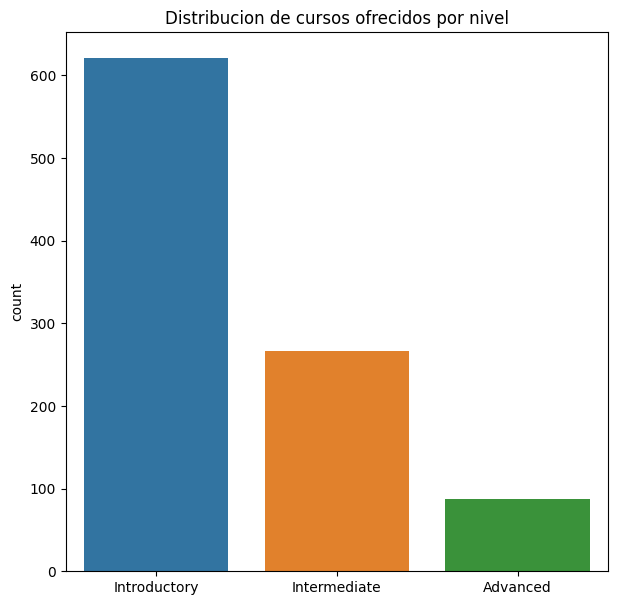

In [50]:
#revision de cantidad de cursos por nivel
plt.figure(figsize = (7,7))
plot = sns.countplot(data = edx_courses, x = 'Level')
plt.title('Distribucion de cursos ofrecidos por nivel')
plt.xlabel('')
plt.show()

<Figure size 500x500 with 0 Axes>

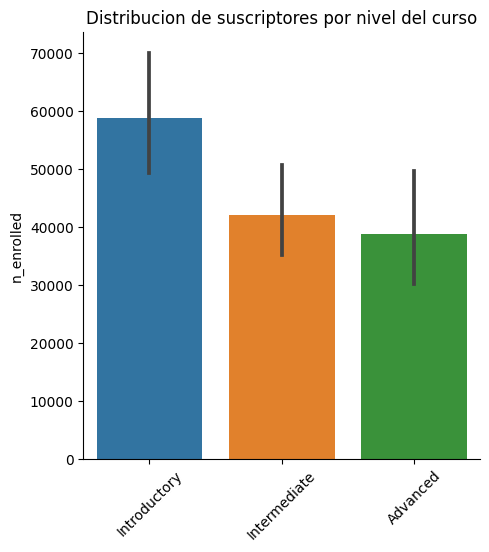

In [51]:
# distribucion de suscriptores por nivel de curso
plt.figure(figsize = (5,5))
plot = sns.catplot(data=edx_courses, x ='Level', y ='n_enrolled', kind='bar')
plt.xticks(rotation=45)
plt.title('Distribucion de suscriptores por nivel del curso')
plt.xlabel('')
plt.show()

Se observa que a pesar de que la cantidad de cursos ofrecidos es mayor para nivel introductorio la cantidad de suscriptores es bastante pareja para cada nivel de dificultad. 

In [52]:
#revision de cantidad de cursos por tipo
edx_courses['course_type'].value_counts()

Self-paced        916
Instructor-led     58
Name: course_type, dtype: int64

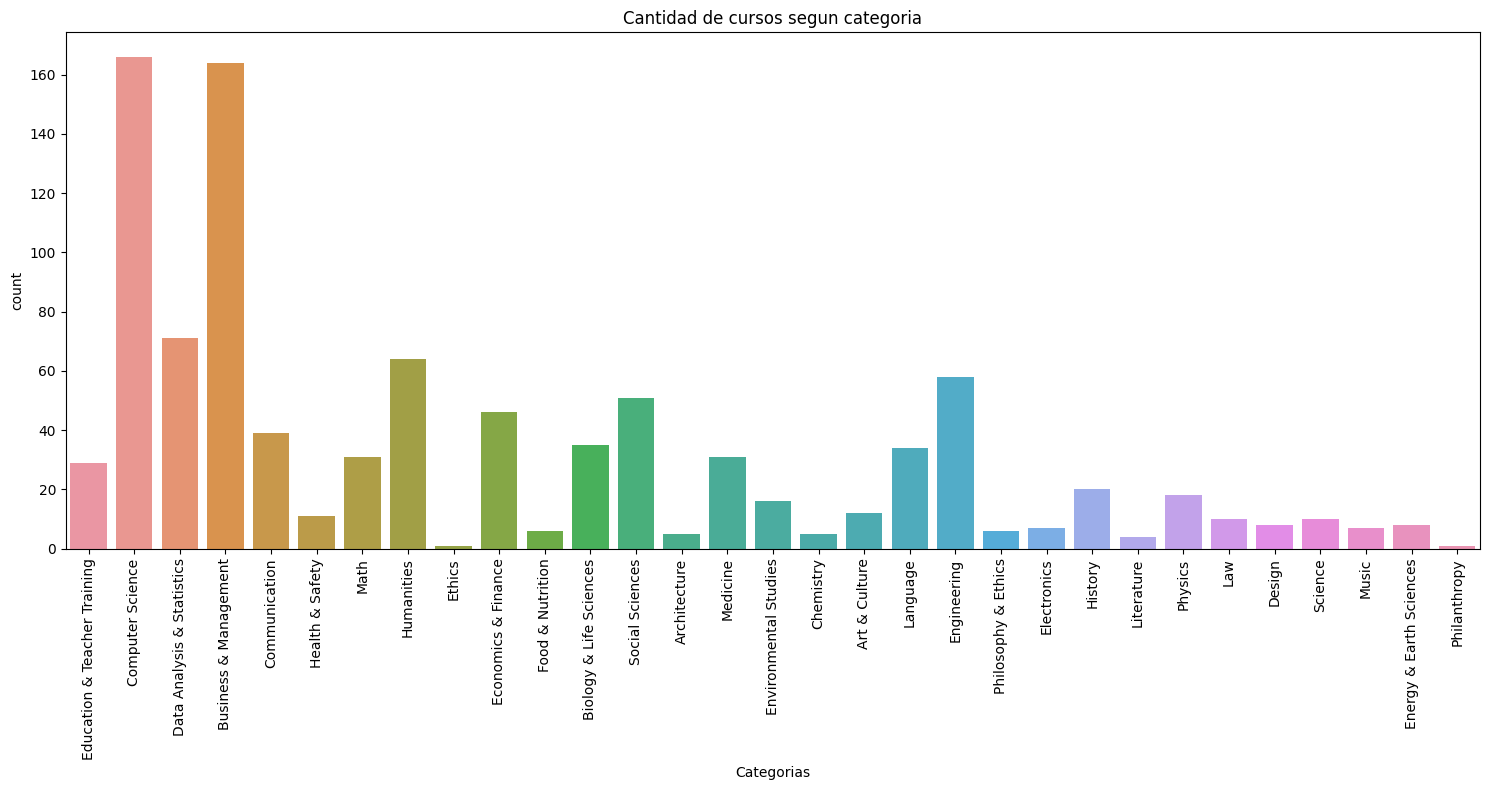

In [53]:
#revision de cantidad de cursos por categoria
plt.figure(figsize = (15,8))
plot = sns.countplot(x=edx_courses['subject'])
plt.xticks(rotation=90)
plt.title('Cantidad de cursos segun categoria')
plt.xlabel('Categorias')
plt.tight_layout()
plt.show()

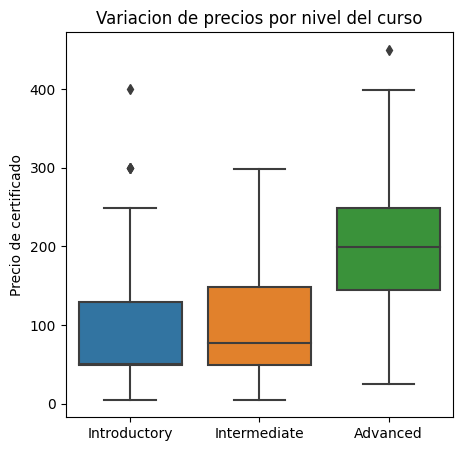

In [54]:
# Revision de precios por nivel de curso
plt.figure(figsize = (5,5))
plot = sns.boxplot(data=edx_courses,  x = 'Level', y = 'price_certification')
plt.title('Variacion de precios por nivel del curso')
plt.xlabel('')
plt.ylabel('Precio de certificado')
plt.show()

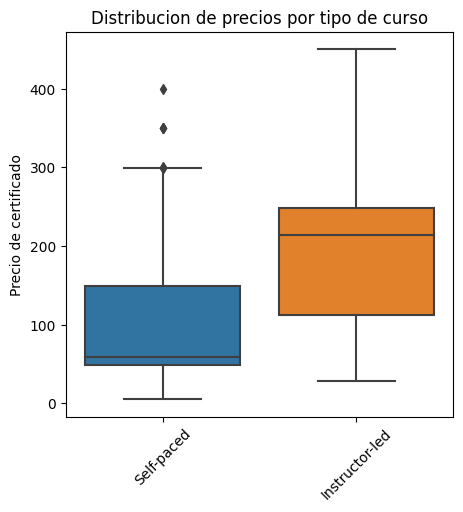

In [55]:
# Revision de precios por tipo de curso
plt.figure(figsize = (5,5))
plot = sns.boxplot(data=edx_courses,  x = 'course_type', y = 'price_certification')
plt.xticks(rotation=45)
plt.title('Distribucion de precios por tipo de curso')
plt.xlabel('')
plt.ylabel('Precio de certificado')
plt.show()

El precio de certificacion varia segun el nivel del curso, asi como tambien presenta una notoria diferencia segun el tipo de curso. Esta tendencia es de esperarse debido al costo que implica cada curso y depende ademas de la institucion y cantidad de instructores correspondientes a cada uno.

<Figure size 700x700 with 0 Axes>

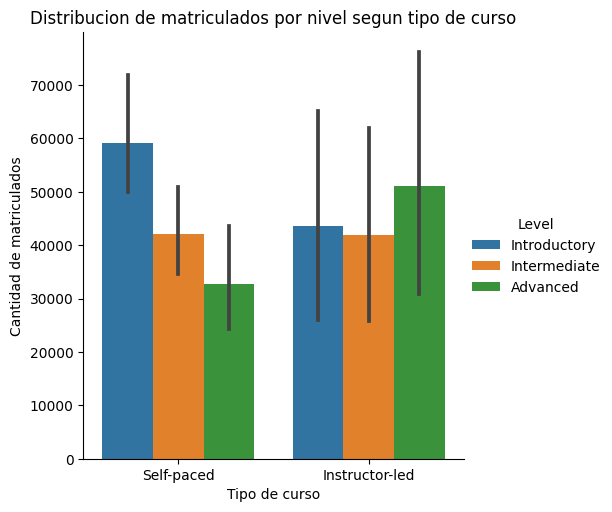

In [56]:
#revision la cant de inscritos por nivel considerando el tipo de curso
plt.figure(figsize = (7,7))
plot = sns.catplot(data = edx_courses, x = 'course_type', y = 'n_enrolled', hue='Level', kind="bar")
plt.title('Distribucion de matriculados por nivel segun tipo de curso')
plt.xlabel('Tipo de curso')
plt.ylabel('Cantidad de matriculados')
plt.show()

In [57]:
edx_courses[(edx_courses['n_enrolled']>=40000) & (edx_courses['course_type']=='Instructor-led')]

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,price_certification,course_duration
3,The Analytics Edge,129555,Instructor-led,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,English,199.0,13
13,English Grammar and Style,52141,Instructor-led,The University of Queensland,Introductory,Humanities,English,English,99.0,8
19,Strategic Social Media Marketing,103640,Instructor-led,Boston University,Advanced,Business & Management,English,English,399.0,6
91,Probability - The Science of Uncertainty and Data,205615,Instructor-led,Massachusetts Institute of Technology,Advanced,Data Analysis & Statistics,English,English,300.0,16
106,Machine Learning with Python: from Linear Mode...,85561,Instructor-led,Massachusetts Institute of Technology,Advanced,Computer Science,English,English,300.0,15
129,Supply Chain Analytics,145049,Instructor-led,Massachusetts Institute of Technology,Introductory,Business & Management,English,English,199.0,15
139,Introduction to Biology - The Secret of Life,147512,Instructor-led,Massachusetts Institute of Technology,Introductory,Biology & Life Sciences,English,"English, 中文",150.0,16
153,Artificial Intelligence (AI),265104,Instructor-led,Columbia University,Advanced,Computer Science,English,English,249.0,12
205,Marketing Analytics,55228,Instructor-led,Columbia University,Advanced,Business & Management,English,English,249.0,12
260,Machine Learning,150855,Instructor-led,Columbia University,Advanced,Computer Science,English,English,249.0,12


A pesar de que los cursos ofrecidos con instructores es muy baja con respecto a los cursos tipo 'self', la cantidad de matriculados es mayor para la primera. Es decir, hay mayor demanda de matriculados con menor cantidad de cursos.

In [58]:
#revision de los distintos idiomas
edx_courses['language'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

Como se nota poca presencia de idiomas que no sean espanol o ingles, se clasifican como otros idiomas.

In [59]:
edx_courses['language'] = np.where((edx_courses['language'] != 'English') & (edx_courses['language'] != 'Español'), 'another language', edx_courses['language'])

In [60]:
edx_courses.describe()

,n_enrolled,price_certification,course_duration
count,9.740000e+02,974.000000,974.000000
mean,5.243678e+04,100.467002,6.702259
std,1.115540e+05,69.607901,3.150173
min,5.001000e+03,5.000000,1.000000
25%,1.268525e+04,49.000000,4.000000
50%,3.135300e+04,79.000000,6.000000
75%,5.214100e+04,149.000000,8.000000
max,2.442271e+06,450.000000,18.000000


<Figure size 700x700 with 0 Axes>

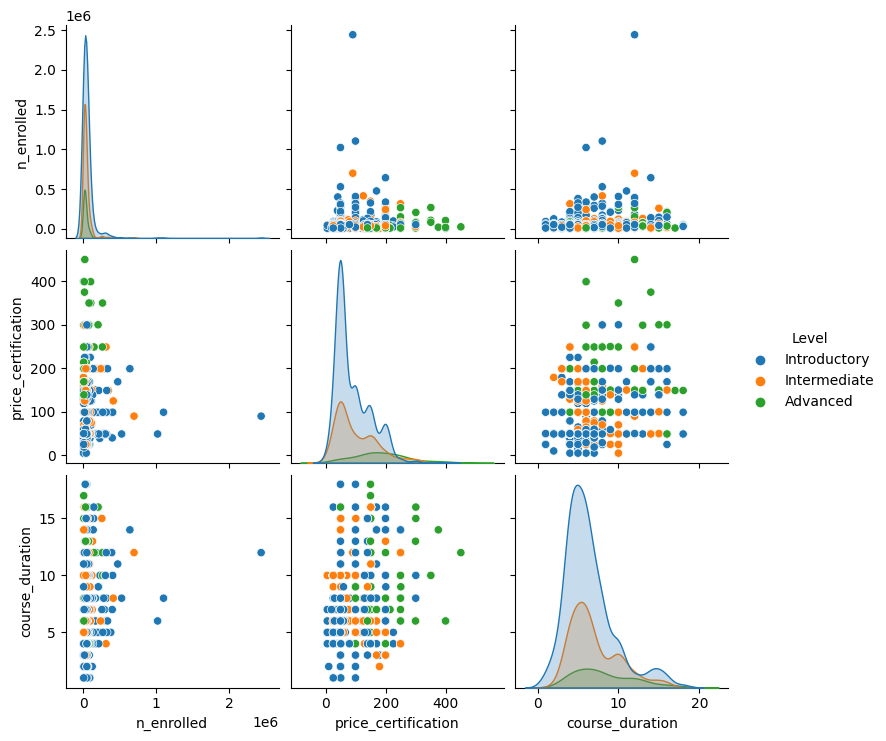

In [61]:
# Hacemos un pairplot para ver la correlación entre las variables numericas
plt.figure(figsize = (7,7))
sns.pairplot(data=edx_courses, hue="Level")
plt.show()

Del grafico se observa mayor demanda para nivel introductorio, los precios para obtener certificados en el nivel avanzado mantienen una distribucion normal pero en los otros casos no. La mayor cantidad de matriculados se encuentra en los cursos con precio de certificacion bajo y nivel introductorio o intermedio

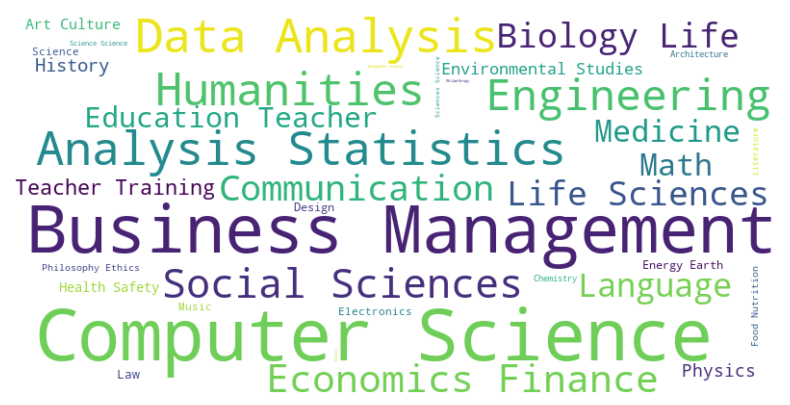

In [62]:
# Nube de palabras de las categorias de los cursos
cursos=' '.join(edx_courses['subject'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cursos)

# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

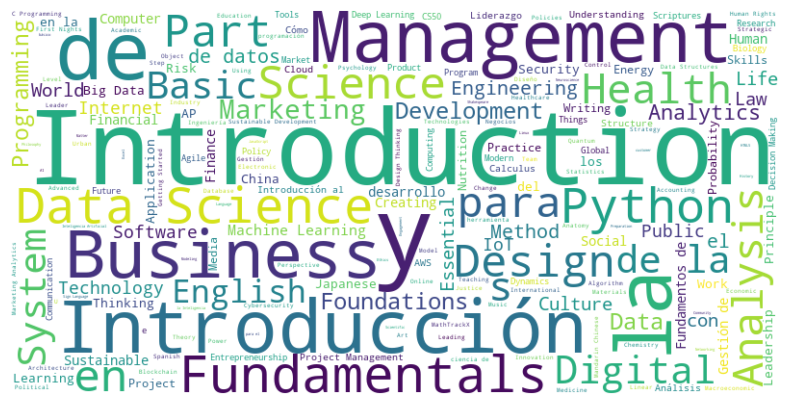

In [63]:
# Nube de palabras de los titulos de los cursos
cursos=' '.join(edx_courses['title'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cursos)

# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Edx cuenta con dos tipos de cursos: Los cursos "Instructor-led on a course schedule" tienen un cronograma fijo, tareas programadas y una mayor interacción en tiempo real con el instructor y otros estudiantes. Por otro lado, los cursos "Self-paced on your time" ofrecen flexibilidad para acceder y completar el curso en cualquier momento, sin un cronograma establecido, y permiten a los estudiantes adaptar el ritmo de estudio a sus necesidades individuales. 

Entre los cursos ofrecidos por edX destacan los de categoria Computer Science, Business & Management, Engineering, Communication. 

## Coursera

In [64]:
# lectura de los datasets para visualizar la informacion
coursera_courses=pd.read_csv(r'Moocs\Coursera_courses.csv', sep=',', encoding='utf8')
coursera_reviews=pd.read_csv(r'Moocs\Coursera_reviews.csv', sep=',', encoding='utf8')

In [65]:
# Visualizacion del dataset y su informacion
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [66]:
# Visualizacion del dataset y su informacion
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [67]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [68]:
eval_registros(coursera_reviews)

La columna reviews tiene 140 registros nulos, 458278 datos unicos y 996433 registros repetidos entre ellos
La columna reviewers tiene 0 registros nulos, 287808 datos unicos y 1166903 registros repetidos entre ellos
La columna date_reviews tiene 0 registros nulos, 1892 datos unicos y 1452819 registros repetidos entre ellos
La columna rating tiene 0 registros nulos, 5 datos unicos y 1454706 registros repetidos entre ellos
La columna course_id tiene 0 registros nulos, 604 datos unicos y 1454107 registros repetidos entre ellos


In [69]:
#eliminacion de duplicados y nulos en el dataset de reviews
coursera_reviews=coursera_reviews.drop_duplicates()
coursera_reviews=coursera_reviews.dropna()

In [70]:
#las variables con registros tipo string las pasamos a mayuscula para descartar posibilidad de duplicados
columnas=['reviews','reviewers']
for columna in columnas:
    coursera_reviews[columna]=coursera_reviews[columna].apply(lambda x: x.strip().upper())

In [71]:
#Revision nuevamente de duplicados en el dataset de reviews
coursera_reviews=coursera_reviews.drop_duplicates()

In [72]:
coursera_reviews.shape

(519874, 5)

Las calificaciones de usuarios son datos muy delicados, por ello se crea una funcion para determinar la longitud de los comentarios y descartar aquellos que son muy cortos o, en caso contrario extremadamente largos

In [73]:
#funcion para evaluar la longitud de caracteres menores a una cantidad 'num' definida
def long(cell,num):
    count = 0
    length = len(str(cell))
    if length < num:
        count += 1
    return count

In [74]:
# revision de datos de reviewers con errores
coursera_reviews[coursera_reviews['reviewers'].apply(lambda x: long(x,8))!=0]

,reviews,reviewers,date_reviews,rating,course_id
90,THIS COURSE WAS AWEFUL! I FEEL LIKE I DIDNT LE...,BY ELI,"Sep 18, 2017",1,financial-markets-global
99,AS IT WAS HIGHLIGHTED AS FREE COURSE WITH CERT...,BY K,"Apr 13, 2020",1,financial-markets-global
171,VERY BAD,BY S. S,"Jul 22, 2020",1,financial-markets-global
338,"NOT AS GREAT AS EXPECTED, BUT AS THE TEACHER S...",BY ALEX,"Aug 22, 2019",4,financial-markets-global
340,"THIS COURSE IS ABSOLUTELY NOT FOR BEGINNERS, I...",BY 고미라,"Jun 23, 2020",4,financial-markets-global
...,...,...,...,...,...
1450683,VERY SATISFYING,BY ASIF,"Oct 05, 2020",5,technical-support-fundamentals
1451209,IT WAS AMAZING,BY JB,"Aug 25, 2020",5,technical-support-fundamentals
1451520,NICE OVERVIEW.,BY ELIZ,"Jul 20, 2018",5,technical-support-fundamentals
1452552,THIS COURSE WAS BRILLIANT. PROFESSOR BLOOM WAS...,BY JO P,"Sep 06, 2020",5,introduction-psychology


In [75]:
#eliminacion de de registros cuyo reviews sea menor a 3 caracteres y reviewers cuyo nombre sea menor a 8 caracteres
coursera_reviews=coursera_reviews.drop(coursera_reviews[coursera_reviews['reviews'].apply(lambda x: long(x,4))!=0].index)
coursera_reviews=coursera_reviews.drop(coursera_reviews[coursera_reviews['reviewers'].apply(lambda x: long(x,8))!=0].index)

#Eliminacion de reviews y reviewers extensos
coursera_reviews=coursera_reviews.drop(coursera_reviews[coursera_reviews['reviewers'].apply(lambda x: long(x,50))==0].index)
coursera_reviews=coursera_reviews.drop(coursera_reviews[(coursera_reviews['reviews'].apply(lambda x: long(x,150))==0)].index)

In [76]:
coursera_reviews.shape

(354644, 5)

In [77]:
eval_registros(coursera_reviews)

La columna reviews tiene 0 registros nulos, 288510 datos unicos y 66134 registros repetidos entre ellos
La columna reviewers tiene 0 registros nulos, 199222 datos unicos y 155422 registros repetidos entre ellos
La columna date_reviews tiene 0 registros nulos, 1892 datos unicos y 352752 registros repetidos entre ellos
La columna rating tiene 0 registros nulos, 5 datos unicos y 354639 registros repetidos entre ellos
La columna course_id tiene 0 registros nulos, 603 datos unicos y 354041 registros repetidos entre ellos


Del dataset de Coursera_courses se descartan los cursos sin reviews

In [78]:
#seleccion de los distintos valores de course_id en el dataset de reviews
course_id=coursera_reviews['course_id'].unique()

#Eliminacion de cursos que no tienen reviews 
coursera_courses=coursera_courses[coursera_courses['course_id'].isin(course_id)]

In [79]:
# Revision de rango de fecha de los reviews

#Se pasa primero a formato a fecha
coursera_reviews['date_reviews']=pd.to_datetime(coursera_reviews['date_reviews'])

coursera_reviews['date_reviews'].describe()

C:\Users\daine\AppData\Local\Temp\ipykernel_10248\3358667617.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  coursera_reviews['date_reviews'].describe()


count                  354644
unique                   1892
top       2020-05-18 00:00:00
freq                     1399
first     2015-08-07 00:00:00
last      2020-10-10 00:00:00
Name: date_reviews, dtype: object

Se observa que por anio se obtuvo mayor cantidad de reviews, lo cual puede ser un patron de que la escuela Coursera este aumentando su audiencia, ademas se puede ver como a medida que aumentan los reviews estos clasifican con mayor rating. 

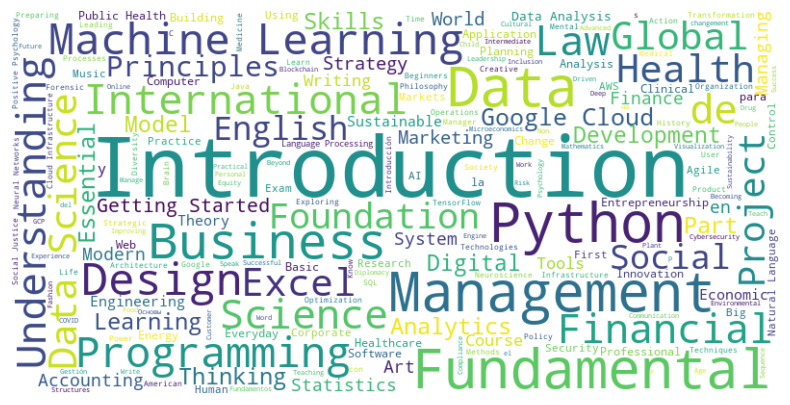

In [80]:
# Nube de palabras para los distintos cursos 
cursos=' '.join(coursera_courses['name'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cursos)

# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

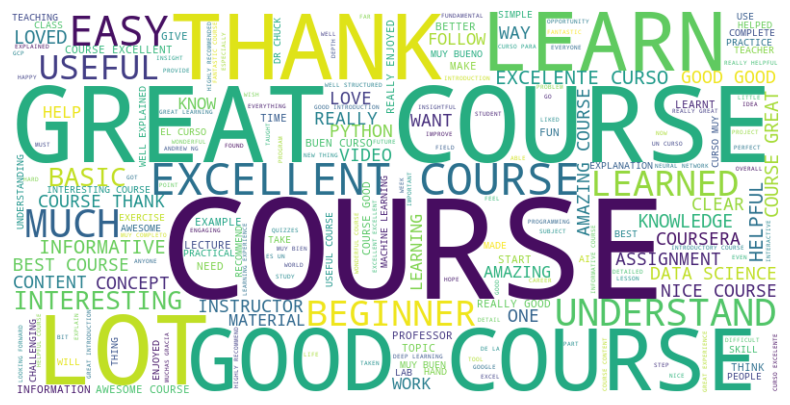

In [81]:
# Nube de palabras para los reviews
cursos=' '.join(coursera_reviews['reviews'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cursos)

# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ya una vez analizado los distintos datasets, se modifican los nombres de algunas columnas y se eliminan las variables que no se necesitan para el analisis posterior en Power BI

In [82]:
# Modificacion de nombre de las columnas
coursera_courses=coursera_courses.rename(columns={'name':'course_title'})
edx_courses=edx_courses.rename(columns={'title':'course_title','n_enrolled':'num_subscribers','Level':'course_level'})
udemy_courses=udemy_courses.rename(columns={'level':'course_level','content_duration':'course_duration','published_timestamp':'date_published'})

In [83]:
edx_courses=edx_courses[['course_title','num_subscribers','course_type','course_level','subject','language','price_certification','institution']]
udemy_courses=udemy_courses[['course_id','course_title','is_paid','price','num_subscribers','num_reviews','course_level','subject','date_published']]
coursera_courses.drop(['course_url'], axis=1, inplace=True)
coursera_reviews.drop(['reviews'], axis=1, inplace=True)

In [84]:
coursera_courses.to_csv('coursera_courses.csv', sep = ',', encoding='utf8', index = False)
udemy_courses.to_csv('udemy_courses.csv', sep = ',', encoding='utf8', index = False)
edx_courses.to_csv('edx_courses.csv', sep = ',', encoding='utf8', index = False)
coursera_reviews.to_csv('coursera_reviews.csv', sep = ';', encoding='utf8', index = False)